# Long-term

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
import seaborn as sns
import math
import gc
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
import random

%matplotlib inline

### Model inputs

In the model health states are declared as:
- a0: *susceptible to both breast - and ovarian cancer*
- a1: *susceptible to ovarian cancer only (assumed not susceptible to a second (relative) or third (index) round of bc*
- a2: *susceptible to breast cancer only (survivor of ovarian cancer)*
- b0: *breast cancer diagnosis*
- b1: *breast cancer stage 1*
- b2: *breast cancer stage 2*
- b3: *breast cancer stage 3*
- b4: *breast cancer stage 4*
- c0: *ovarian cancer diagnosis*
- c1: *ovarian cancer local*
- c2: *ovarian cancer regional*
- c3: *ovarian cancer distant*
- d0: *prophylactic masectomy and oophorectomy*
- d1: *prophylactic masectomy only*
- d2: *prophylactic oophorectomy only*
- e0: *no increased risk for cancer in respective organs (following successful d0)*
- f0: *dead from any cause ('normal' mortality + exces mortality due to organ specific cancer)*
- f1: *dead from breast cancer*
- f2: *dead from ovarian cancer*

#### Transition probability sets

In [2]:
from Transitions import *

C:\Users\larsasp\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\common.py:1920: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype)


## Model specification

In [3]:
from Controls import initial_age
initial_age

In [4]:
def append_time(time):
    time.append(1)
    return time

In [5]:
def time_in_state(time):
    t = len(time)
    return t

In [6]:
from mesa import Agent, Model

class Person(Agent):
    """An agent"""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = initial_age.value
        self.state_a0 = 1
        self.state_a1 = 0
        self.state_a2 = 0
#        self.state_a2r = 0
        self.state_b0 = 0
        self.state_b1 = 0
        self.state_b2 = 0
        self.state_b3 = 0
        self.state_b4 = 0
        self.state_c0 = 0 
        self.state_c1 = 0
        self.state_c2 = 0
        self.state_c3 = 0
        self.state_d0 = 0
        self.state_d1 = 0
        self.state_d2 = 0
        self.state_e0 = 0
        self.state_f0 = 0
        self.state_f1 = 0
        self.state_f2 = 0
        self.t_b1 = []
        self.t_b2 = []
        self.t_b3 = []
        self.t_b4 = []
        self.t_c1 = []
        self.t_c2 = []
        self.t_c3 = []
        self.cycle = 0
        
    def step(self):
        """
        state a0 is the starting state for all agents in self.cycle = 0
        """
        if self.cycle > 0:
            if self.state_a0 == 1:
                if from_a0(self.age)[1] == 1:
                    self.state_b0 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[2] == 1:
                    self.state_c0 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[3] == 1:
                    self.state_d0 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[4] == 1:
                    self.state_d1 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[5] == 1:
                    self.state_d2 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[6] == 1:
                    self.state_f0 += 1
                    self.state_a0 -= 1
                else:
                    self.state_a0 += 0
                    self.age += 1
                
                
            elif self.state_a1 == 1:
                if from_a1(age = self.age)[0] == 1:
                    self.state_a1 += 0
                    self.age += 1
                elif from_a1(age = self.age)[1] == 1:
                    self.state_c0 += 1
                    self.state_a1 -= 1
                    self.age += 1
                elif from_a1(age = self.age)[2] == 2:
                    self.state_d2 += 1
                    self.state_a1 -= 1
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_a1 -= 1
                        
            elif self.state_a2 == 1:
                if from_a2(age = self.age)[0] == 1:
                    self.state_a2 += 0
                    self.age += 1
                elif from_a2(age = self.age)[1] == 1:
                    self.state_b0 += 1
                    self.state_a2 -= 1
                    self.age += 1
                elif from_a2(age = self.age)[3] == 1:
                    self.state_d1 += 1
                    self.state_a2 -= 1
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_a2 -= 1
                        
#                if self.state_a2r == 1:
#                    if from_a2r(age = self.age)[0] == 1:
#                        self.state_a2 += 0
#                        self.age += 1
#                    if from_a2r(age = self.age)[1] == 1:
#                        self.state_b0 += 1
#                        self.state_a2 -= 1
#                        self.age += 1
#                    if from_a2r(age = self.age)[3] == 1:
#                        self.state_d1 += 1
#                        seøf.state_a2 -= 1
#                        self.age += 1
#                    else:
#                        self.state_f0 += 1
#                        self.state_a2 -= 1

            elif self.state_b0 == 1:
                if from_b0(age = self.age)[0] == 1:
                    self.state_b1 += 1
                    self.state_b0 -= 1
                elif from_b0(age = self.age)[1] == 1:
                    self.state_b2 += 1
                    self.state_b0 -= 1
                elif from_b0(age = self.age)[2] == 1:
                    self.state_b3 += 1
                    self.state_b0 -= 1
                else:
                    self.state_b4 += 1
                    self.state_b0 -= 1
                        
            elif self.state_b1 == 1:
                if from_b1(self.age, time_in_state(self.t_b1))[1] == 1:
                    self.state_f1 += 1
                    self.state_b1 -= 1
                elif from_b1(self.age, time_in_state(self.t_b1))[2] == 1:
                    self.state_a1 += 1
                    self.state_b1 -= 1
                    self.age += 1
                else:
                    append_time(self.t_b1)
                    self.state_b1 += 0                    
                    self.age += 1
                        

            elif self.state_b2 == 1:
                if from_b2(self.age, time_in_state(self.t_b2))[1] == 1:
                    self.state_f1 += 1
                    self.state_b2 -= 1          
                elif from_b2(self.age, time_in_state(self.t_b2))[2] == 1:
                    self.state_a1 +=1
                    self.state_b2 -=1
                    self.age += 1
                else:
                    append_time(self.t_b2)
                    self.state_b2 += 0
                    self.age += 1


            elif self.state_b3 == 1:
                if from_b3(self.age, time_in_state(self.t_b3))[1] == 1:
                    self.state_f1 += 1
                    self.state_b3 -= 1          
                elif from_b3(self.age, time_in_state(self.t_b3))[2] == 1:
                    self.state_a1 +=1
                    self.state_b3-=1
                    self.age += 1
                else:
                    append_time(self.t_b3)
                    self.state_b3 += 0
                    self.age += 1
                        
                        
            elif self.state_b4 == 1:
                if from_b4(self.age, time_in_state(self.t_b4))[1] == 1:
                    self.state_f1 += 1
                    self.state_b4 -= 1          
                elif from_b4(self.age, time_in_state(self.t_b4))[2] == 1:
                    self.state_a1 +=1
                    self.state_b4 -=1
                    self.age += 1
                else:
                    append_time(self.t_b4)
                    self.state_b4 += 0
                    self.age += 1
                     
      
            elif self.state_c0 == 1:
                if from_c0()[0] == 1:
                    self.state_c1 += 1
                    self.state_c0 -= 1
                elif from_c0()[1] == 1:
                    self.state_c2 += 1
                    self.state_c0 -= 1
                else:
                    self.state_c3 += 1
                    self.state_c0 -= 1
                        
                
            elif self.state_c1 == 1:
                if from_c1(self.age, time_in_state(self.t_c1))[1] == 1:
                    self.state_f2 += 1
                    self.state_c1 -= 1
                elif from_c1(self.age, time_in_state(self.t_c1))[2] == 1:
                    self.state_a2 += 1
                    self.state_c1 -=1
                    self.age +=1
                else:
                    append_time(self.t_c1)
                    self.state_c1 += 0
                    self.age +=1
                    
                        
            elif self.state_c2 == 1:
                if from_c2(self.age, time_in_state(self.t_c2))[1] == 1:
                    self.state_f2 += 1
                    self.state_c2 -= 1
                elif from_c2(self.age, time_in_state(self.t_c2))[2] == 1:
                    self.state_a2 += 1
                    self.state_c2 -=1
                    self.age +=1
                else:
                    append_time(self.t_c2)
                    self.state_c2 += 0
                    self.age +=1
                
            elif self.state_c3 == 1:
                if from_c3(self.age, time_in_state(self.t_c3))[1] == 1:
                    self.state_f2 += 1
                    self.state_c3 -= 1
                elif from_c3(self.age, time_in_state(self.t_c3))[2] == 1:
                    self.state_a2 += 1
                    self.state_c3 -=1
                    self.age +=1
                else:
                    append_time(self.t_c3)
                    self.state_c3 += 0
                    self.age +=1
                        
            elif self.state_d0 == 1:
                if from_d0(age = self.age) == 1:
                    self.state_d0 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_d0 -= 1
                        
            elif self.state_d1 == 1:
                if from_d1(age = self.age) == 1:
                    self.state_d1 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_d1 -= 1        
                        
            elif self.state_d2 == 1:
                if from_d2(age = self.age) == 1:
                    self.state_d2 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_d2 -= 1
                        
            elif self.state_e0 == 1:
                if from_e0(age = self.age) == 1:
                    self.state_e0 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_e0 -= 1
                        
        self.cycle += 1

In [7]:
def trace_a0(model):
    agent_a0 = [agent.state_a0 for agent in model.schedule.agents]
    x = sum(agent_a0)
    N = model.num_agents
    B = x / N
    return x

def trace_a1(model):
    agent_a1 = [agent.state_a1 for agent in model.schedule.agents]
    x = sum(agent_a1)
    N = model.num_agents
    B = x / N
    return x

def trace_a2(model):
    agent_a2 = [agent.state_a2 for agent in model.schedule.agents]
    x = sum(agent_a2)
    N = model.num_agents
    B = x / N
    return x

#def trace_A2r(model):
#    agent_a2r = [agent.state_A2r for agent in model.schedule.agents]
#    x = sum(agent_a2r)
#    N = model.num_agents
#    B = x / N
#    return B

def trace_b1(model):
    agent_b1 = [agent.state_b1 for agent in model.schedule.agents]
    x = sum(agent_b1)
    N = model.num_agents
    B = x / N
    return x

def trace_b2(model):
    agent_b2 = [agent.state_b2 for agent in model.schedule.agents]
    x = sum(agent_b2)
    N = model.num_agents
    B = x / N
    return x

def trace_b3(model):
    agent_b3 = [agent.state_b3 for agent in model.schedule.agents]
    x = sum(agent_b3)
    N = model.num_agents
    B = x / N
    return x

def trace_b4(model):
    agent_b4 = [agent.state_b4 for agent in model.schedule.agents]
    x = sum(agent_b4)
    N = model.num_agents
    B = x / N
    return x

def trace_c1(model):
    agent_c1 = [agent.state_c1 for agent in model.schedule.agents]
    x = sum(agent_c1)
    N = model.num_agents
    B = x / N
    return x

def trace_c2(model):
    agent_c2 = [agent.state_c2 for agent in model.schedule.agents]
    x = sum(agent_c2)
    N = model.num_agents
    B = x / N
    return x

def trace_c3(model):
    agent_c3 = [agent.state_c3 for agent in model.schedule.agents]
    x = sum(agent_c3)
    N = model.num_agents
    B = x / N
    return x

def trace_e0(model):
    agent_e0 = [agent.state_e0 for agent in model.schedule.agents]
    x = sum(agent_e0)
    N = model.num_agents
    B = x / N
    return x

def trace_f0(model):
    agent_f0 = [agent.state_f0 for agent in model.schedule.agents]
    x = sum(agent_f0)
    N = model.num_agents
    B = x / N
    return x

def trace_f1(model):
    agent_f1 = [agent.state_f1 for agent in model.schedule.agents]
    x = sum(agent_f1)
    N = model.num_agents
    B = x / N
    return x

def trace_f2(model):
    agent_f2 = [agent.state_f2 for agent in model.schedule.agents]
    x = sum(agent_f2)
    N = model.num_agents
    B = x / N
    return x


In [8]:
class hboc(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.cycle  = 0
        self.schedule = RandomActivation(self)
        
        # Create agents
        for i in range(self.num_agents):
            a = Person(i, self)
            self.schedule.add(a)    
        # Store data after each step
        self.datacollector = DataCollector(model_reporters=
                                           {"a0": trace_a0,
                                            "a1": trace_a1,
                                            "a2": trace_a2,
                                            "b1": trace_b1,
                                            "b2": trace_b2,
                                            "b3": trace_b3,
                                            "b4": trace_b4,
                                            "c1": trace_c1,
                                            "c2": trace_c2,
                                            "c3": trace_c3,
                                            "f1": trace_f0,
                                            "f2": trace_f1,
                                            "f3": trace_f2},
                                          agent_reporters={
                                             "a0": lambda a: a.state_a0,
                                             "a1": lambda a: a.state_a1,
                                             "a2": lambda a: a.state_a2,
                                             "b1": lambda a: a.state_b1,
                                             "b2": lambda a: a.state_b2,
                                             "b3": lambda a: a.state_b3,
                                             "b4": lambda a: a.state_b4,
                                             "c1": lambda a: a.state_c1,
                                             "c2": lambda a: a.state_c2,
                                             "c3": lambda a: a.state_c3,
                                             "f0": lambda a: a.state_f0,
                                             "f1": lambda a: a.state_f1,
                                             "f2": lambda a: a.state_f2}
                                          )
        
    def step(self):
        # store data  
        self.datacollector.collect(self)
                
        #advnace a step
        self.schedule.step()

In [9]:
model = hboc(1000)
for i in range(51):
    model.step()


In [10]:
all_agent_movement = model.datacollector.get_agent_vars_dataframe()
all_agent_movement.to_csv('Agents.csv')
df = pd.read_csv('Agents.csv')
df

,Step,AgentID,f2,f1,f0,a1,a0,c3,b3,b2,b1,c1,b4,a2,c2
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,7,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,9,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
df2 = df.groupby('AgentID')['a0','a1', 'a2', 'b1', 'b2', 'b3', 'b4', 'c1', 'c2', 'c3', 'f0', 'f1', 'f2'].sum()
df2

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0,43,0,0
1,2,0,0,1,0,0,0,0,0,0,0,47,0
2,28,0,0,0,0,0,0,0,0,0,23,0,0
3,10,0,0,0,0,0,0,0,0,0,41,0,0
4,11,0,0,0,0,0,0,0,0,0,40,0,0
5,13,0,0,0,0,0,0,0,0,0,38,0,0
6,3,0,0,0,0,0,0,0,0,0,48,0,0
7,22,0,0,0,0,0,0,0,0,0,29,0,0
8,33,0,0,0,0,0,0,0,0,0,18,0,0


In [12]:
b = df2[(df2.b1 > 0)|(df2.b2 > 0)|(df2.b3 > 0)|(df2.b4 > 0) ]

In [13]:
b

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
1,2,0,0,1,0,0,0,0,0,0,0,47,0
9,18,0,0,0,0,0,1,0,0,0,0,31,0
10,22,1,0,0,7,0,0,0,0,0,20,0,0
16,9,0,0,3,0,0,0,0,0,0,0,38,0
21,11,0,0,0,2,0,0,0,0,0,0,37,0
24,11,12,0,7,0,0,0,0,0,0,20,0,0
30,16,18,0,7,0,0,0,0,0,0,9,0,0
38,28,0,0,0,0,0,1,0,0,0,0,21,0
39,8,0,0,0,0,0,4,0,0,0,0,38,0


In [14]:
c = df2[(df2.c1 > 0) | (df2.c2 > 0) | (df2.c3 > 0)]
c

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
51,2,0,0,0,0,0,0,0,0,2,0,0,46
195,10,0,0,0,0,0,0,0,0,7,0,0,33
821,21,0,0,0,0,0,0,0,0,1,0,0,28


In [15]:
output = model.datacollector.get_model_vars_dataframe()
output

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f1,f2,f3
0,1000,0,0,0,0,0,0,0,0,0,0,0,0
1,1000,0,0,0,0,0,0,0,0,0,0,0,0
2,949,0,0,0,0,0,0,0,0,0,34,0,0
3,908,0,0,8,3,0,5,0,0,1,59,0,0
4,876,0,0,17,5,0,9,0,0,1,75,1,0
5,826,0,0,26,9,0,10,0,0,0,107,3,1
6,791,0,0,36,12,0,9,0,0,0,127,9,1
7,754,0,0,44,13,0,11,0,0,0,157,13,1
8,725,0,0,47,13,0,7,0,0,0,177,21,1
9,683,0,0,52,14,0,6,0,0,0,207,25,1


In [16]:
# Det ser kanskje ut som om koden har en bug som gjør at funksjonen med "dersom i state_bi" i 10 år -> a1, 
# den fungerer faktisk, men i o m at denne kreften er såpass sjelden på aggregert nivå, og at den har en økt dødelighet
# ser det slik ut. 

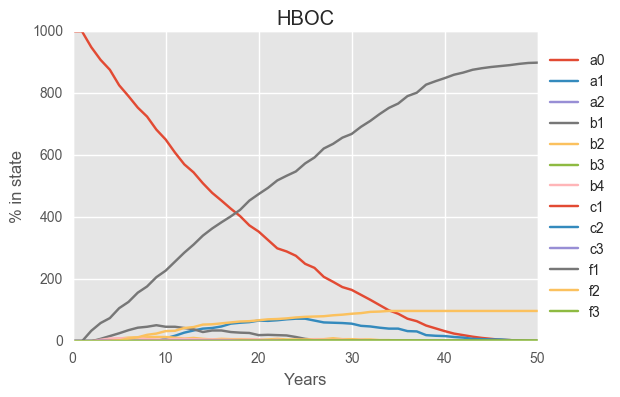

In [17]:
ax = output.plot()
ax.set_xlabel('Years')
ax.set_ylabel('% in state')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('HBOC')
#plt.savefig('M:\pc\Desktop\plot.png', dpi = 400)